# Visualization attempts


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import my_tools as mt

df_cases_new = mt.read_csv('cases_new')
df_cases_total = mt.read_csv('cases_total')
df_cases_relative = mt.read_csv('cases_relative')

df_deaths_new = mt.read_csv('deaths_new')
df_deaths_total = mt.read_csv('deaths_total')
df_deaths_relative = mt.read_csv('deaths_relative')

df_populations =  pd.read_csv('data/populations_2018.csv')

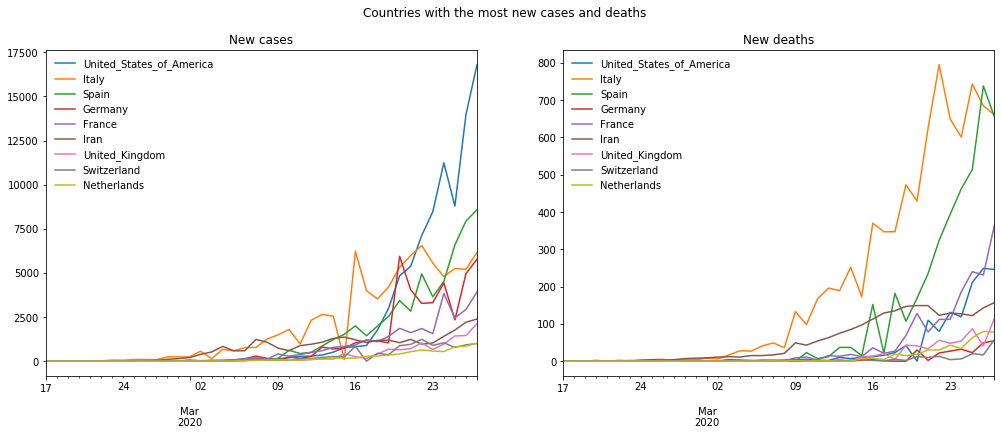

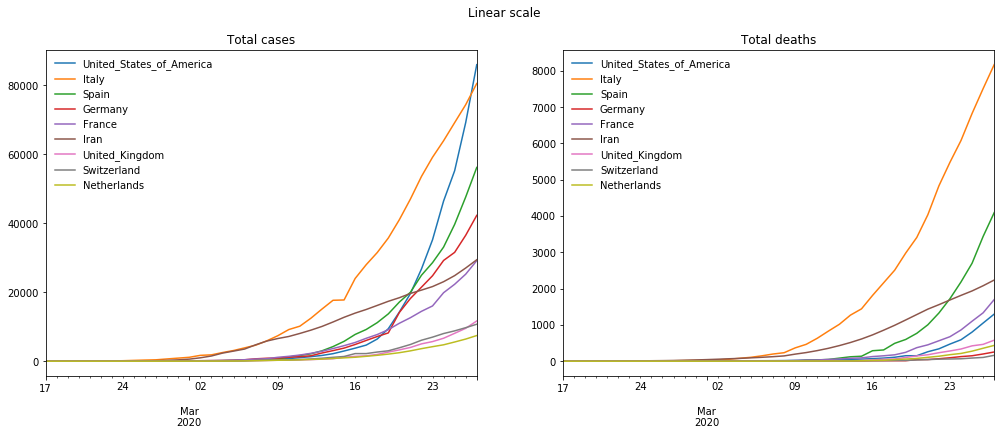

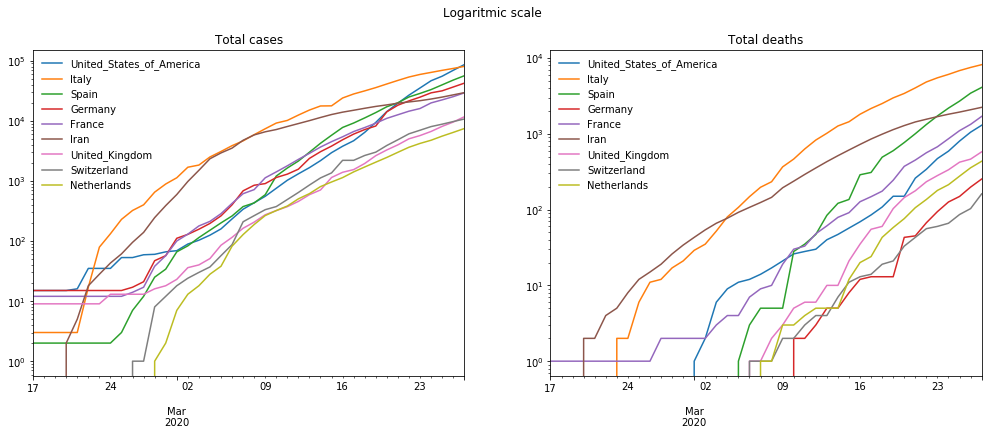

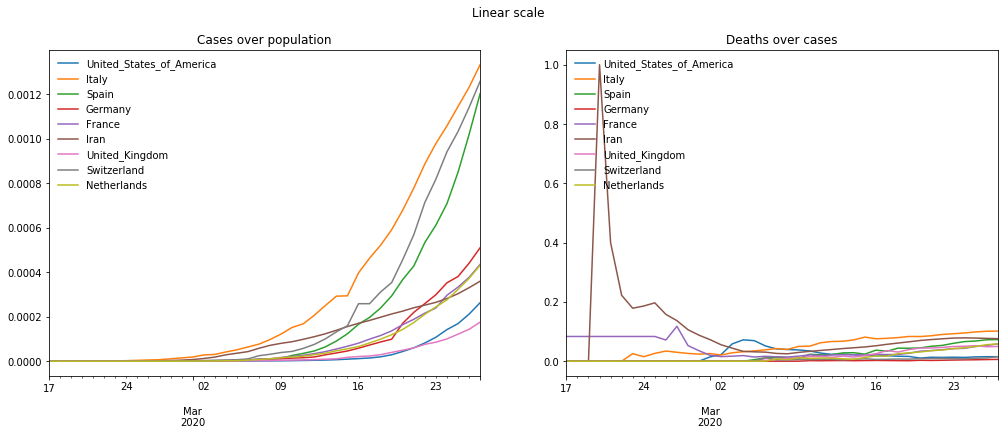

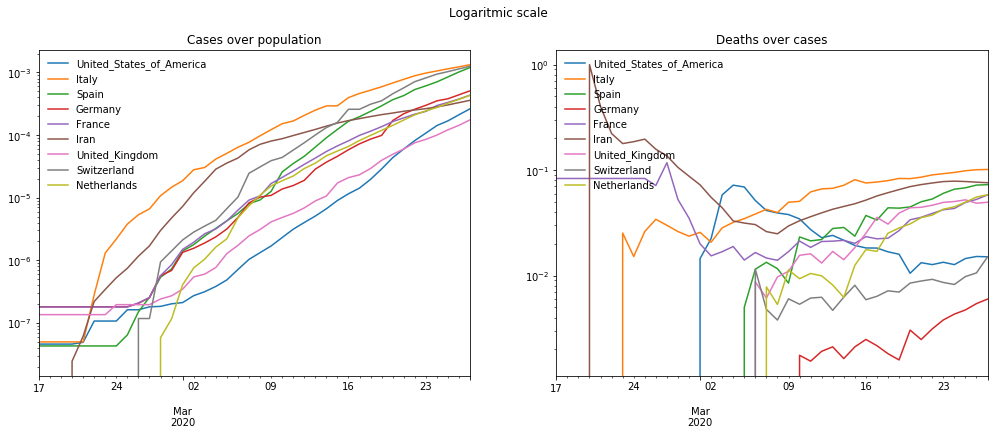

In [2]:
import my_tools as mt
import datetime

today= datetime.date.today()

worst_cases_new = mt.worst_in_cat(today, 'cases_new')
worst_deaths_new = mt.worst_in_cat(today, 'deaths_new')

most_active_today = worst_cases_new.intersection(worst_deaths_new)


df_cases_most_new = df_cases_new[most_active_today].tail(40)
df_cases_most_new.name = 'New cases'
df_deaths_most_new = df_deaths_new[most_active_today].tail(40)
df_deaths_most_new.name = 'New deaths'

df_cases_most_total = df_cases_total[most_active_today].tail(40)
df_cases_most_total.name = 'Total cases'
df_deaths_most_total = df_deaths_total[most_active_today].tail(40)
df_deaths_most_total.name = 'Total deaths'

df_cases_most_relative = df_cases_relative[most_active_today].tail(40)
df_cases_most_relative.name = 'Cases over population'
df_deaths_most_relative = df_deaths_relative[most_active_today].tail(40)
df_deaths_most_relative.name = 'Deaths over cases'


mt.plot_side_by_side(df_cases_most_new, df_deaths_most_new, title='Countries with the most new cases and deaths')

mt.plot_side_by_side(df_cases_most_total, df_deaths_most_total, title='Linear scale')
mt.plot_side_by_side(df_cases_most_total, df_deaths_most_total, scale='log', title='Logaritmic scale')

mt.plot_side_by_side(df_cases_most_relative, df_deaths_most_relative, title='Linear scale')
mt.plot_side_by_side(df_cases_most_relative, df_deaths_most_relative, scale='log', title='Logaritmic scale')

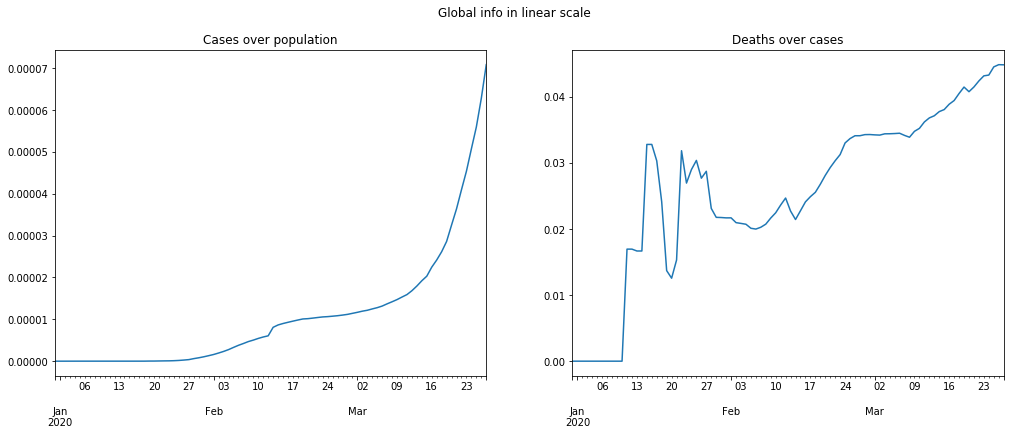

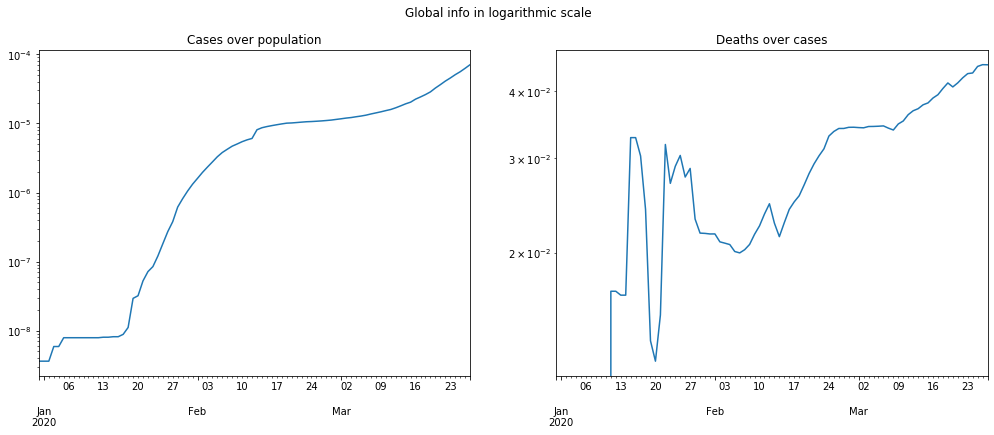

In [5]:
global_cases_relative = df_cases_total.sum(axis=1) / df_populations.sum(axis=0)[1]
global_cases_relative.name = 'Cases over population'
global_deaths_relative  = df_deaths_total.sum(axis=1) / df_cases_total.sum(axis=1)
global_deaths_relative.name = 'Deaths over cases'

mt.plot_side_by_side(global_cases_relative, global_deaths_relative, leg=False, title='Global info in linear scale')
mt.plot_side_by_side(global_cases_relative, global_deaths_relative, leg=False, scale='log', title='Global info in logarithmic scale')